**Упражнение 1 - Numpy**

1. Пусть у двух матриц совпадает количество строк. Объедините их в одну горизонтально (объедините столбцы этих матриц)
2. Пусть дана пuтру-матрица  𝑀  и два массива индексов  𝑎,𝑏  одинаковой длины. Постройте массив элементов 𝑀[𝑎[0],𝑏[0]],𝑀[𝑎[1],𝑏[1]],…  Указание: для выполнения этой операции не требуется никаких именных функций.
3. Подсчитайте след матрицы и количество ненулевых элементов на ее диагонали
4. Даны два произвольных numpy-массива одинаковой размерности  (𝑛,𝑚) . Замените нулями те элементы второго массива, для которых на соответствующем месте в первом массиве находятся отрицательные числа
5. Даны две матрицы с одинаковым количеством строк и количеством столбцов  𝑛  и  𝑚  соответственно. Постройте матрицу  𝑛×𝑚 всевозможных произведений столбцов друг на друга (в смысле скалярного произведения).

In [5]:
import numpy as np
A = np.array([[1, 1, 1], [1, 1, 1]])
B = np.array([[2, 2, 2], [2, 2, 2]])
np.concatenate((A, B), axis=1)

array([[1, 1, 1, 2, 2, 2],
       [1, 1, 1, 2, 2, 2]])

In [22]:
import numpy as np
M = np.arange(27).reshape(3,9)
a = np.array([1,2,1])
b = np.array([3,2,1])
print(M)
print(M[a,b])

[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]]
[12 20 10]


In [24]:
import numpy as np
M = np.arange(25).reshape(5,5)
tr = np.trace(M)
n = np.count_nonzero(np.diagonal(M))
print(M)
print(tr, ' ', n)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
60   4


In [26]:
import numpy as np
A = np.array([[1, -1, 1], [1, 1, -1]])
B = np.array([[2, 2, 2], [2, 2, 2]])
B[(A < 0)] = 0
print(B)

[[2 0 2]
 [2 2 0]]


In [28]:
import numpy as np
A = np.array([[1, 2, 3], [1, 2, 4]])
B = np.array([[2, 0], [1, 0]])
C = np.dot(A.T,B)
print(C)

[[ 3  0]
 [ 6  0]
 [10  0]]


**Упражнение 2 - Matplotlib**

1. Постройте таблицу 2X2 из четырех графиков (см. функцию plt.subplots)
2. Постройте график с крестами ошибок
3. Постройте график в логарифмическом масштабе без явного вычисления логарифмов

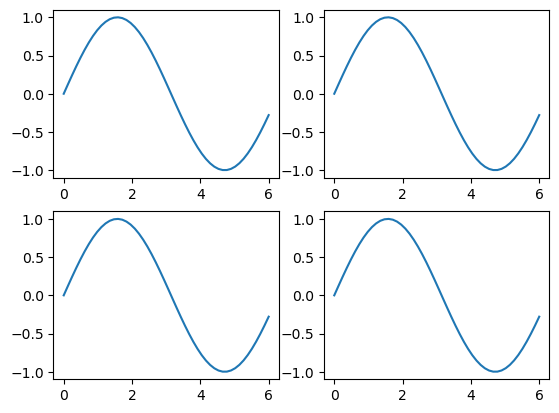

In [31]:
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(0, 6, 50)
sin_ys = np.sin(xs)
fig, axs = plt.subplots(2,2)

axs[0,0].plot(xs, sin_ys)
axs[0,1].plot(xs, sin_ys)
axs[1,0].plot(xs, sin_ys)
axs[1,1].plot(xs, sin_ys)

<ErrorbarContainer object of 3 artists>

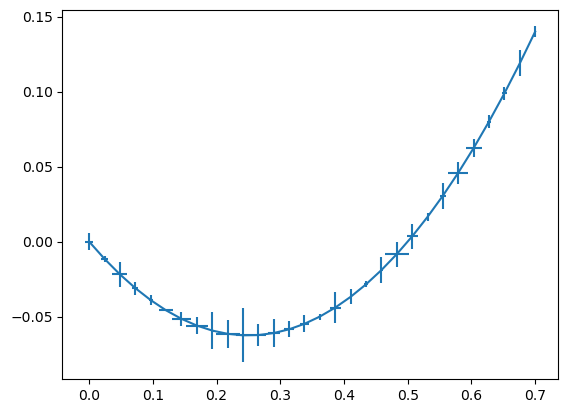

In [33]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 0.7, 30)
ys = xs**2 - 0.5 * xs
ys_shifted = ys + np.random.normal(scale=0.01, size=xs.shape)
xs_error = np.abs(np.random.normal(scale=0.01, size=xs.shape))
ys_error = np.abs(np.random.normal(scale=0.01, size=xs.shape))

plt.errorbar(xs, ys, xs_error, ys_error)

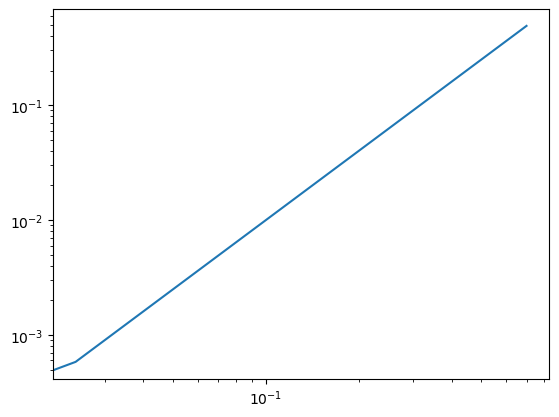

In [35]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 0.7, 30)
ys = xs**2
plt.loglog(xs,ys)

**Упражнение 3 - Погрешности**

1. Оценить погрешность в определении корней уравнения $a y^3+d=0$, если величины $a=1$ и $d=8$ заданы с точностью $\Delta(a)=10^{-3}$ и $\Delta(d)=10^{-3}$.

2. Определить оптимальный шаг численного дифференцирования $h_{\text{opt}}$ при использовании для вычисления производной приближенной формулы

$$
u^{\prime}(x) \approx \frac{u(x-2 h)-8 u(x-h)+8 u(x+h)-u(x+2 h)}{12 h},
$$

Какой порядок аппроксимации имеет эта формула? Известно, что, $\left|u^{(5)}(t)\right| \leq M_5$, а значения функций вычисляются с точностью $\Delta u$.

1. Вычислим погрешность согласно формулам:

$$\Delta(y^3)=\Delta(-d/a)=\frac{d \Delta a+a \Delta d}{a^2}=\frac{8 \cdot 10^{-3} +1 \cdot 10^{-3}}{1^2}=9 \cdot 10^{-3}$$

$$\Delta(y)=\Delta((y^3)^{1/3})=1/3 \cdot |y^3|^{1/3-1} \Delta (y^{3})=1/3 \cdot 8^{-2/3} \cdot 9 \cdot 10^{-3}=0.75 \cdot 10^{-3}$$

2. Раскладываем правую часть по формуле Тейлора и получаем:

$$u'(x)-\frac{h^4u^{(5)}(x)}{30} $$

Из условия $\left|u^{(5)}(t)\right| \leq M_5$, поэтому получаем максимальную ошибку метода:

$$\varepsilon_\text{method} = \frac{M_5h^4}{30}$$

Ошибка округления:

$$\varepsilon_\text{round}=\frac{18\Delta u}{12h}$$

По условию суммарная ошибка: $$\varepsilon_\text{total} = \varepsilon_\text{method} + \varepsilon_\text{round}$$

Тогда для данной формулы:

$$
\varepsilon_{\text{total}}(h) = \frac{M_5h^4}{30} + \frac{3\Delta u}{2h}
$$

Берем производную по h:

$$0 = \varepsilon_\text{total}'(h_*) = \frac{2M_5h_*^3}{15} - \frac{3\Delta u}{2{h_*}^2}\\h_* = \sqrt[5]\frac{45\Delta u}{4M_5} $$

**Упражнение 4 - Погрешность определения корня уравнения**

С каким числом верных знаков (или относительной погрешностью) должен быть известен свободный член в уравнении $x^2-2 x+0.999993751=0$, чтобы корни имели четыре верных знака?

Выделим в уравнении полный квадрат:

$$(x-1)^2-1+0.999993751 = (x-1)^2-0.000006249 = 0$$

Оба корня примерно равны 1, значит, их абсолютная погрешность должна быть не более $0.00005$ (4 верных знака), то есть $\Delta (x-1) = 0.00005$.

При взятии квадратного корня погрешность числа $\Delta\left(a^{1/2}\right)=1/2 \cdot a^{1/2-1} \Delta a$, значит, погрешность свободного члена при взятии корня должна быть $\Delta(x-1)=1/2 \cdot 0.000006249^{-1/2} \cdot \Delta c$, где $\Delta c$ - искомая величина.

Вычисляем, что $c = 2.5 \cdot 10^{-7}$. Это значит, что число должно быть известно с точностью до восьмого знака.

**Упражнение 5 - Рост погрешности в последовательности**

Пусть задана последовательность чисел $x_n, n=0,1,2, \ldots$, причем $5 x_{n+1}-x_n=4$, а $x_0$ известно с относительной погрешностью $10^{-6}$. При каких значениях $x_0$ относительная погрешность при вычислении $x_n$ будет быстро возрастать с ростом $n$ ?

$(n+1)$-ый член последовательности будет определяться по формуле:
$$x_{n+1}=\frac{4}{5}+\frac{x_n}{5}.$$
Тогда начиная с некоторого номера $n$ члены последовательности станут положительными (если изначально было положительное число, то члены сразу $>0$.\
Если число $x_n>0$ и имеет некоторую погрешность $\Delta x_n$, то следующее число $x_{n+1}$ будет больше, чем $\frac{x_n}{5}$, а его абсолютная погрешность будет равна $\frac{\Delta x_n}{5}$. Значит, относительная погрешность стала меньше, чем была (меньше, чем $\frac{\Delta x_n}{x_n}$), и такого $x_0$, чтобы относительная погрешность увеличивалась, не существует.